In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
def simulate(initials, propensities, stoichiometry, duration):
    """
    Run a simulation with given model.

    :param initials: List of initial population counts.
    :param propensities: List of functions that take population counts and give transition rates.
    :param stoichiometry: List of integers, how the population counts change per transition.
    :param duration: Maximum simulation time.
    :return: Two lists: The time points and population counts per time point.
    """

    # initial values
    times = [0.0]
    counts = [initials]

    # while finish time has not been reached
    while times[-1] < duration:
        # get current state
        state = counts[-1]

        # calculate rates with respective propensities
        rates = [prop(*state) for prop in propensities]

        # stop loop if no transitions available
        #if all(r == 0 for r in rates):
        #    break

        # randomly draw one transition weighted by rates
        transition = random.choices(stoichiometry, weights=rates)[0]
        next_state = [a + b for a, b in zip(state, transition)]

        # draw next time increment from random exponential distribution
        r = random.random()
        #dt = np.log(1.0 / r) / sum(rates)

        dt = random.expovariate(sum(rates))
        #print(f' time: {times[-1]}')
        # append new values
        times.append(times[-1] + dt)
        counts.append(next_state)

    return times, counts

Attempt three using euimins code more eactly

In [ ]:
from scipy.optimize import root




#k1k2k3 model
def gen_data_k1k2k3(krrt, tend):
    stoich = [
        [1, 0, 0, 0, 0, 0, 0, 0, 0],  # E000 -> E000 + M (reaction 1)
        [1, 0, 0, 0, 0, 0, 0, 0, 0],  # E001 -> E001 + M (reaction 2)
        [1, 0, 0, 0, 0, 0, 0, 0, 0],  # E010 -> E010 + M (reaction 3)
        [1, 0, 0, 0, 0, 0, 0, 0, 0],  # E100 -> E100 + M (reaction 4)
        [1, 0, 0, 0, 0, 0, 0, 0, 0],  # E011 -> E011 + M (reaction 5)
        [1, 0, 0, 0, 0, 0, 0, 0, 0],  # E101 -> E101 + M (reaction 6)
        [1, 0, 0, 0, 0, 0, 0, 0, 0],  # E110 -> E110 + M (reaction 7)
        [-1, 0, 0, 0, 0, 0, 0, 0, 0], # M -> 0 (reaction 8)
        [0, -1, 1, 0, 0, 0, 0, 0, 0], # E000 -> E001 (reaction 9)
        [0, 1, -1, 0, 0, 0, 0, 0, 0], # E001 -> E000 (reaction 10)
        [0, -1, 0, 1, 0, 0, 0, 0, 0], # E000 -> E010 (reaction 11)
        [0, 1, 0, -1, 0, 0, 0, 0, 0], # E010 -> E000 (reaction 12)
        [0, -1, 0, 0, 1, 0, 0, 0, 0], # E000 -> E100 (reaction 13)
        [0, 1, 0, 0, -1, 0, 0, 0, 0], # E100 -> E000 (reaction 14)
        [0, 0, -1, 0, 0, 1, 0, 0, 0], # E001 -> E011 (reaction 15)
        [0, 0, 1, 0, 0, -1, 0, 0, 0], # E011 -> E001 (reaction 16)
        [0, 0, -1, 0, 0, 0, 1, 0, 0], # E001 -> E101 (reaction 17)
        [0, 0, 1, 0, 0, 0, -1, 0, 0], # E101 -> E001 (reaction 18)
        [0, 0, 0, -1, 0, 1, 0, 0, 0], # E010 -> E110 (reaction 19)
        [0, 0, 0, 1, 0, -1, 0, 0, 0], # E110 -> E010 (reaction 20)
        [0, 0, 0, -1, 0, 0, 0, 1, 0], # E010 -> E011 (reaction 21)
        [0, 0, 0, 1, 0, 0, 0, -1, 0], # E011 -> E010 (reaction 22)
        [0, 0, 0, 0, -1, 0, 1, 0, 0], # E100 -> E101 (reaction 23)
        [0, 0, 0, 0, 1, 0, -1, 0, 0], # E101 -> E100 (reaction 24)
        [0, 0, 0, 0, -1, 0, 0, 1, 0], # E100 -> E110 (reaction 25)
        [0, 0, 0, 0, 1, 0, 0, -1, 0], # E110 -> E100 (reaction 26)
        [0, 0, 0, 0, 0, -1, 0, 0, 1], # E011 -> E111 (reaction 27)
        [0, 0, 0, 0, 0, 1, 0, 0, -1], # E111 -> E011 (reaction 28)
        [0, 0, 0, 0, 0, 0, -1, 0, 1], # E101 -> E111 (reaction 29)
        [0, 0, 0, 0, 0, 0, 1, 0, -1], # E111 -> E101 (reaction 30)
        [0, 0, 0, 0, 0, 0, 0, -1, 1], # E110 -> E111 (reaction 31)
        [0, 0, 0, 0, 0, 0, 0, 1, -1], # E111 -> E110 (reaction 32)
    ]
    #Rates
    c=1e-1
    kf = 1e3     # Forward binding rate
    kr1 = 10   # Reverse unbinding rate for [RE]
    kr2 = kr1*c  # Reverse unbinding rate for [R^2E]
    kr3 = kr1*c*c # Reverse unbinding rate for [R^3E]
    a= 1e2  # Transcription rate
    b = 1 # Degredation rate

    RT = 1000
    # M, E000, E001, E010, E100, E011, E101, E110, E111
    propensities = [
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: a*E000,  # E000 -> E000 + M (reaction 1)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: a*E001,  # E001 -> E001 + M (reaction 2)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: a*E010,  # E010 -> E010 + M (reaction 3)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: a*E100,  # E100 -> E100 + M (reaction 4)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: a*E011,  # E011 -> E011 + M (reaction 5)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: a*E101,  # E101 -> E101 + M (reaction 6)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: a*E110,  # E110 -> E110 + M (reaction 7)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: b*M,     # M -> 0 (reaction 8)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E000,    # E000 -> E001 (reaction 9)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr1*E001, # E001 -> E000 (reaction 10)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E000,    # E000 -> E010 (reaction 11)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr1*E010, # E010 -> E000 (reaction 12)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E000,    # E000 -> E100 (reaction 13)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr1*E100, # E100 -> E000 (reaction 14)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E001,    # E001 -> E011 (reaction 15)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr2*E011, # E011 -> E001 (reaction 16)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E001,    # E001 -> E101 (reaction 17)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr2*E101, # E101 -> E001 (reaction 18)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E010,    # E010 -> E110 (reaction 19)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr2*E011, # E011 -> E010 (reaction 20)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E010,    # E010 -> E011 (reaction 21)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr2*E110, # E110 -> E010 (reaction 22)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E100,    # E100 -> E101 (reaction 23)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr2*E101, # E101 -> E100 (reaction 24)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E100,    # E100 -> E110 (reaction 25)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr2*E110, # E110 -> E100 (reaction 26)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E011,    # E011 -> E111 (reaction 27)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr3*E111, # E111 -> E011 (reaction 28)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E101,    # E101 -> E111 (reaction 29)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr3*E111, # E111 -> E101 (reaction 30)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kf*RT*E110,    # E110 -> E111 (reaction 31)
        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: kr3*E111  # E111 -> E110 (reaction 32)
    ]

    s0 = [0, 1, 0, 0, 0, 0, 0, 0, 0] # M, E000, E001, E010, E100, E011, E101, E110, E111

    t, states = simulate(s0, propensities, stoich, tend)
    M, E000, E001, E010, E100, E011, E101, E110, E111= zip(*states)
    M, E000, E001, E010, E100, E011, E101, E110, E111 =  list(M), list(E000),list(E001), list(E010), list(E100), list(E011), list(E101), list(E110), list(E111)
    return t, M, E000, E001, E010, E100, E011, E101, E110, E111

#euimins model below
def gen_data(krrt, tend):
    #krrt=root(f,0).x # The effective number of repressors where the transcriptional activity has the value of tranV. If tranV=0.9, this is E90
    stoich=[[1, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [-1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, -1, 1, 0, 0, 0, 0, 0, 0],
            [0, 1, -1, 0, 0, 0, 0, 0, 0],
            [0, -1, 0, 1, 0, 0, 0, 0, 0],
            [0, 1, 0, -1, 0, 0, 0, 0, 0],
            [0, -1, 0, 0, 1, 0, 0, 0, 0],
            [0, 1, 0, 0, -1, 0, 0, 0, 0],
            [0, 0, -1, 0, 0, 1, 0, 0, 0],
            [0, 0, 1, 0, 0, -1, 0, 0, 0],
            [0, 0, -1, 0, 0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0, 0, -1, 0, 0],
            [0, 0, 0, -1, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, -1, 0, 0, 0],
            [0, 0, 0, -1, 0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0, 0, 0, -1, 0],
            [0, 0, 0, 0, -1, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0, -1, 0, 0],
            [0, 0, 0, 0, -1, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0, 0, -1, 0],
            [0, 0, 0, 0, 0, -1, 0, 0, 1],
            [0, 0, 0, 0, 0, 1, 0, 0, -1],
            [0, 0, 0, 0, 0, 0, -1, 0, 1],
            [0, 0, 0, 0, 0, 0, 1, 0, -1],
            [0, 0, 0, 0, 0, 0, 0, -1, 1],
            [0, 0, 0, 0, 0, 0, 0, 1, -1],]
    # parameter values and stoichometry matrix

    norma1 = 10
    normb1 = 0.01
    coop1 = 0.0001
    coop2 = 0.0001
    tend = 50000.0
    tranV=0.9

    #lambda M, E000, E001, E010, E100, E011, E101, E110, E111:
    propensities = [lambda M, E000, E001, E010, E100, E011, E101, E110, E111: norma1*E000,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: norma1*E001,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: norma1*E010,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: norma1*E100,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: norma1*E011,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: norma1*E101,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: norma1*E110,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: normb1*M,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E000,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: krrt*E001,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E000,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: krrt*E010,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E000,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: krrt*E100,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E001,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop1*krrt*E011,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E001,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop1*krrt*E101,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E010,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop1*krrt*E011,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E010,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop1*krrt*E110,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E100,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop1*krrt*E101,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E100,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop1*krrt*E110,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E011,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop2*coop1*krrt*E111,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E101,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop2*coop1*krrt*E111,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: E110,
                        lambda M, E000, E001, E010, E100, E011, E101, E110, E111: coop2*coop1*krrt*E111]
    s0 = [0, 1, 0, 0, 0, 0, 0, 0, 0] # M, E000, E001, E010, E100, E011, E101, E110, E111

    t, states = simulate(s0, propensities, stoich, tend)
    M, E000, E001, E010, E100, E011, E101, E110, E111= zip(*states)
    M, E000, E001, E010, E100, E011, E101, E110, E111 =  list(M), list(E000),list(E001), list(E010), list(E100), list(E011), list(E101), list(E110), list(E111)
    return t, M, E000, E001, E010, E100, E011, E101, E110, E111

def tranHill3(krrt,coop):
    return 1 - 1/(1 + 3*coop**2*krrt + 3*coop**3*krrt**2 + coop**3*krrt**3) # Transcriptional activity of the cooperative binding-based switch
def f(x):
    return tranHill3(x,coop1)-tranV

In [ ]:
import matplotlib.pyplot as plt
from math import ceil
from scipy.interpolate import interp1d


def plotmRNA(axs,t,M,E111,krrt):
    ''' Plots the number of mRNA in green and the number
        of E111 in Red, both on a single axis.
    '''
    colors = {
    'mRNA' : 'forestgreen',
    'E111' : 'crimson'
    }
    #fig, axs = plt.subplots(1,1)
    tp = [float(i) for i in t] #convert t's to floats
    tp = tp[:-1] #Throw away the last term
    #Set up first axis
    axs.set_xlabel('time')
    axs.set_ylabel('number of mRNA', c= colors['mRNA'])
    axs.set_ybound(lower=-0.05)
    axs.plot(tp, M[:-1], label="M", c= colors['mRNA'])
    axs.tick_params(axis='y', labelcolor= colors['mRNA'])

    # Set up the second y-axis with a complementary color
    ax2 = axs.twinx()  # instantiate a second Axes that shares the same x-axis

    ax2.set_ylabel('Repressed DNA', c=colors['E111'])  # we already handled the x-label with ax1
    true_t = np.linspace(0,max(t[:-1]), len(t[:-1]))
    ax2.scatter(true_t, interp1d(t, E111, kind='previous')(true_t),label="E111", c=colors['E111'],  s=1,alpha=0.3)
    ax2.tick_params(axis='y', labelcolor=colors['E111'])
    ax2.set_ylim(-0.05,1.05)

    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    axs.set_title(f"Krrt = {krrt} | Coop three binding sites")
    plt.xlabel("Time")
    plt.ylabel("Number of mRNA")
    #fig.tight_layout()
    #plt.show()

In [ ]:
'''TEND = 1e5
for KRRT in (1000, 10000, 100000):
    t, M, E000, E001, E010, E100, E011, E101, E110, E111 = gen_data(KRRT,TEND)

    plotmRNA(axs[0, i],t,M,E111,KRRT)
    # Select the last 5000 datapoints
    FINAL_PERCENTAGE = .5 #Get the last FINAL_PERCENTAGE of data
    LAST_POINTS = int(TEND*FINAL_PERCENTAGE)
    #First add time between the data

    true_time = np.linspace(0, max(t), 1000)
    interp_M = interp1d(t, M, kind='previous')
    true_time_M= interp_M(true_time)
    data_last = true_time_M[-LAST_POINTS :]


    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.hist(data_last, bins=50, alpha=0.7, color= 'forestgreen')  # You can adjust the number of bins as needed
    plt.xlabel('Number of mRNA')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of the last {LAST_POINTS} datapoints | krrt = {KRRT}')
    plt.xscale('linear')  # Set the x-axis to log scale
    plt.show()'''

"TEND = 1e5\nfor KRRT in (1000, 10000, 100000):\n    t, M, E000, E001, E010, E100, E011, E101, E110, E111 = gen_data(KRRT,TEND)\n\n    plotmRNA(axs[0, i],t,M,E111,KRRT)\n    # Select the last 5000 datapoints\n    FINAL_PERCENTAGE = .5 #Get the last FINAL_PERCENTAGE of data\n    LAST_POINTS = int(TEND*FINAL_PERCENTAGE) \n    #First add time between the data\n\n    true_time = np.linspace(0, max(t), 1000)\n    interp_M = interp1d(t, M, kind='previous')\n    true_time_M= interp_M(true_time) \n    data_last = true_time_M[-LAST_POINTS :]\n\n\n    # Plot the histogram\n    plt.figure(figsize=(10, 6))\n    plt.grid(True)\n    plt.hist(data_last, bins=50, alpha=0.7, color= 'forestgreen')  # You can adjust the number of bins as needed\n    plt.xlabel('Number of mRNA')\n    plt.ylabel('Frequency')\n    plt.title(f'Histogram of the last {LAST_POINTS} datapoints | krrt = {KRRT}')\n    plt.xscale('linear')  # Set the x-axis to log scale\n    plt.show()"

Here we wanna make the histogram

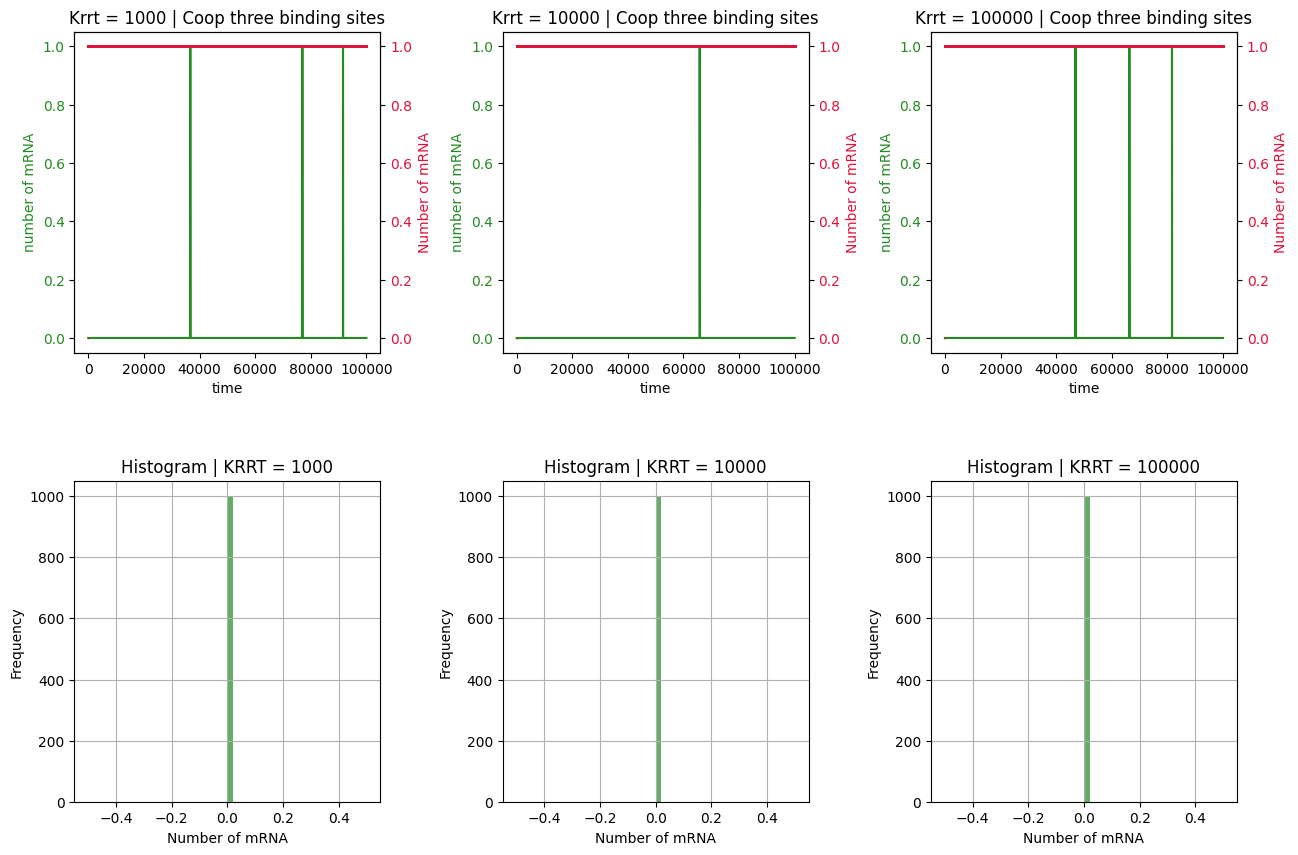

In [ ]:

TEND = 1e5
KRRT_values = [1000, 10000, 100000]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the spacing between plots

for i, KRRT in enumerate(KRRT_values):
    t, M, E000, E001, E010, E100, E011, E101, E110, E111 = gen_data_k1k2k3(KRRT,TEND)
    # Plot mRNA data (line plot)
    plotmRNA(axs[0, i], t, M, E111, KRRT)

    # Select the last 50% of data points
    FINAL_PERCENTAGE = .5
    LAST_POINTS = int(len(t) * FINAL_PERCENTAGE)
    true_time = np.linspace(0, max(t), 1000)
    interp_M = interp1d(t, M, kind='previous')
    true_time_M = interp_M(true_time)
    data_last = true_time_M[-LAST_POINTS:]

    # Plot the histogram
    axs[1, i].hist(data_last, bins=50, alpha=0.7, color='forestgreen')
    axs[1, i].set_xlabel('Number of mRNA')
    axs[1, i].set_ylabel('Frequency')
    axs[1, i].set_title(f'Histogram | KRRT = {KRRT}')
    axs[1, i].grid(True)

plt.show()

Below is alternate formulations of the reactions. I keep it here for completeness.

In [ ]:
# M, E000, E001, E010, E100, E011, E101, E110, E111



In [ ]:
'''import matplotlib.pyplot as plt

#Here we define the propensities
c=1e-4
kf = 1.0     # Forward binding rate
kr1 = 1e-2   # Reverse unbinding rate for [RE]
kr2 = kr1*c  # Reverse unbinding rate for [R^2E]
kr3 = kr1*c*c # Reverse unbinding rate for [R^3E]
a= 1  # Transcription rate
b = 0.01 # Degredation rate

RT = 1

t = 500  # duration

#The state order will be
#E000, E100, E010, E001, E101, E011, E110, E111, M
initials = [1, 0,0,0, 0,0,0, 0, 0]

propensities = [#Reactions involving mRNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: a*RT*E000, #E -> E+mRNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: a*RT*E100, #E -> E+mRNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: a*RT*E010, #E -> E+mRNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: a*RT*E001, #E -> E+mRNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: a*RT*E101, #E -> E+mRNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: a*RT*E110, #E -> E+mRNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: a*RT*E011, #E -> E+mRNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: b*M,       #mRNA -> 0
                #Reactions from empty DNA
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E000,#E000 -> E100
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E000,#E000 -> E010
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E000,#E000 -> E001
                #Reactions from one bound site
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr1*E100,  #E100 -> E000
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr1*E010,  #E010 -> E000
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr1*E001,  #E001 -> E000
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E100,  #E100 -> E101
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E100,  #E100 -> E110
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E010,  #E010 -> E110
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E010,  #E010 -> E011
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E001,  #E001 -> E101
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E001,  #E001 -> E011
                #Reactions from two bound site
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr2*E101,    #E101 -> E100
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr2*E101,    #E101 -> E001
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr2*E110,    #E110 -> E100
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr2*E110,    #E110 -> E010
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr2*E011,    #E011 -> E010
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr2*E011,    #E011 -> E001
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E110,  #E110 -> E111
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E101,  #E101 -> E111
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kf*RT*E011,  #E011 -> E111
                #Reactions from three bound site
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr3*E111,    #E111 -> E110
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr3*E111,    #E111 -> E101
                lambda E000, E100, E010, E001, E101, E011, E110, E111, M: kr3*E111]    #E111 -> E011

#E000, E100, E010, E001, E101, E011, E110, E111, M
stoichiometry = [
                [0,0,0,0,0,0,0,0,1],  #E000 -> E000+mRNA
                [0,0,0,0,0,0,0,0,1],  #E100 -> E100+mRNA
                [0,0,0,0,0,0,0,0,1],  #E010 -> E010+mRNA
                [0,0,0,0,0,0,0,0,1],  #E001 -> E001+mRNA
                [0,0,0,0,0,0,0,0,1],  #E110 -> E110+mRNA
                [0,0,0,0,0,0,0,0,1],  #E101 -> E101+mRNA
                [0,0,0,0,0,0,0,0,1],  #E011 -> E011+mRNA
                [0,0,0,0,0,0,0,0,-1],  #mRNA -> 0
                #Reactions from empty DNA
                [-1,1,0,0,0,0,0,0,0],#E000 -> E100
                [-1,0,1,0,0,0,0,0,0],#E000 -> E010
                [-1,0,0,1,0,0,0,0,0],#E000 -> E001
                #Reactions from one bound site
                [1,-1,0,0,0,0,0,0,0],  #E100 -> E000
                [1,-1,0,0,0,0,0,0,0],  #E010 -> E000
                [1.-1,0,0,0,0,0,0,0],  #E001 -> E000
                [0,-1,0,0,1,0,0,0,0],  #E100 -> E101
                [0,-1,0,0,0,0,1,0,0],  #E100 -> E110
                [0,0,-1,0,0,0,1,0,0],  #E010 -> E110
                [0,0,-1,0,0,1,0,0,0],  #E010 -> E011
                [0,0,0,-1,1,0,0,0,0],  #E001 -> E101
                [0,0,0,-1,0,1,0,0,0],  #E001 -> E011
                #Reactions from two bound site
                [0,1,0,0,-1,0,0,0,0],    #E101 -> E100
                [0,0,0,1,-1,0,0,0,0],    #E101 -> E001
                [0,1,0,0,0,0,-1,0,0],    #E110 -> E100
                [0,0,1,0,0,0,-1,0,0],    #E110 -> E010
                [0,0,1,0,0,-1,0,0,0],    #E011 -> E010
                [0,0,0,1,0,-1,0,0,0],    #E011 -> E001
                [0,0,0,0,0,0,-1,1,0],  #E110 -> E111
                [0,0,0,0,-1,0,0,1,0],  #E101 -> E111
                [0,0,0,0,0,-1.0,1,0],  #E011 -> E111
                #Reactions from three bound site
                [0,0,0,0,0,0,1,-1,0],    #E111 -> E110
                [0,0,0,0,1,0,0,-1,0],    #E111 -> E101
                [0,0,0,0,0,1,0,-1,0]]    #E111 -> E011
t, states = simulate(initials, propensities, stoichiometry, t)
E000, E100, E010, E001, E101, E011, E110, E111, M= zip(*states)
print(M)
print(t)

fig, axs = plt.subplots(2)

axs[0].plot(t, M, label="M", c='green')

axs[1].plot(t, E000, label="E000", c='#327bb7')  # Slightly lighter
axs[1].plot(t, E100, label="E100", c='#4880bb')  # Light blue
axs[1].plot(t, E010, label="E010", c='#5e86bf')  # Lighter blue
axs[1].plot(t, E001, label="E001", c='#739bcc')  # Mid blue
axs[1].plot(t, E110, label="E110", c='#89b1da')  # Light sky blue
axs[1].plot(t, E101, label="E101", c='#a0c7e8')  # Lighter sky blue
axs[1].plot(t, E011, label="E011", c='#b6ddf6')  # Very light sky blue
axs[1].plot(t, E111, label="E111", c='lightcoral')  # Original tab:blue

plt.title("Coop three binding sites")
plt.xlabel("Time")
plt.ylabel("Number of mRNA")
plt.legend()
plt.show()
#plt.savefig("equilibrium.png")'''

In [ ]:
'''from scipy.integrate import odeint
# Define rate constants
c=1e-4
kf = 1.0     # Forward binding rate
kr1 = 1e-2   # Reverse unbinding rate for [RE]
kr2 = kr1*c  # Reverse unbinding rate for [R^2E]
kr3 = kr1*c*c # Reverse unbinding rate for [R^3E]
alpha = 1  # Transcription rate
beta = 0.01 # Degredation rate
# Define initial conditions
R_0 = 1  # Initial repressor concentration.
          #Recall for these parameters the transcription factor flips at around
          #RTtilde=1e-3, RT = RTtilde kf/kr1, so RT = 10
E_0 = 1.0    # Initial DNA concentration
RE_0, R2E_0, R3E_0, M_0 = 0.0, 0.0, 0.0, 0.0  # Initial concentrations of other species

# Define ODE system
def ode_system(y, t, kf, kr1, kr2, kr3, alpha):
    R, E, RE, R2E, R3E, M = y

    dR_dt = -kf * (R * (E + RE + R2E)) + kr1 * RE + kr2 * R2E + kr3 * R3E
    dE_dt = kr1 * RE - kf * R * E
    dRE_dt = kf * R * E + kr2 * R2E - kr1 * RE - kf * R * RE
    dR2E_dt = kf * R * RE - kr2 * R2E + kr3 * R3E - kf * R * R2E
    dR3E_dt = kf * R * R2E - kr3 * R3E
    dM_dt = alpha * (E + RE + R2E) - beta*M

    return [dR_dt, dE_dt, dRE_dt, dR2E_dt, dR3E_dt, dM_dt]

# Set time range
t = np.linspace(0, 1000, 10000)

# Solve ODEs
y0 = [R_0, E_0, RE_0, R2E_0, R3E_0, M_0]
y = odeint(ode_system, y0, t, args=(kf, kr1, kr2, kr3, alpha))

# Plot results
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[1].plot(t, y[:, 1] +  y[:, 2] + y[:, 3], label='Unsaturated DNA [E]+[RE]+[R^2E]')
axs[1].plot(t, y[:, 4], label='Saturated DNA [R^3E]')
axs[0].plot(t, y[:, 5], label='mRNA [M]', c='green')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()'''